<a href="https://colab.research.google.com/github/Joefamouze/Machine_learning/blob/master/Chapter3_deeplearning_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [10]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 2)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.02959419, -0.37100095],
       [-0.56391644, -0.15131912],
       [-1.3492861 , -0.27212662]], dtype=float32)>


In [11]:
v.assign(tf.ones((3, 2)))

<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [12]:
v.assign_add(tf.ones((3, 2)))
v

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[2., 2.],
       [2., 2.],
       [2., 2.]], dtype=float32)>

In [20]:
input_var = tf.Variable(3)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

In [14]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [21]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [22]:
print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


**Creating a linear classifier**



In [23]:
import numpy as np


num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean = [0, 3],
                                          cov = [[1, 0.5], [0.5, 1]],
                                          size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean = [3, 0],
                                          cov = [[1, 0.5], [0.5, 1]],
                                          size = num_samples_per_class)


In [24]:
#stacking the two classes into an array with shape(2000, 2)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [27]:
# generating the corresponding targets(0 and 1)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

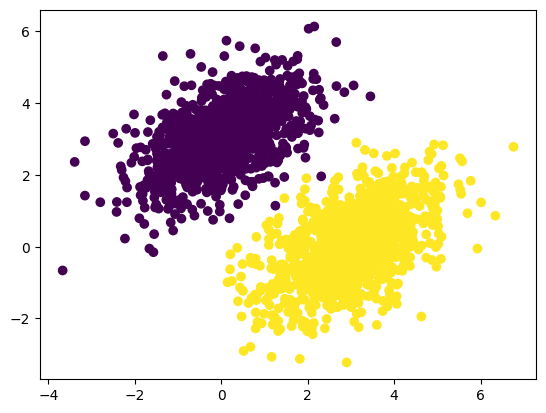

In [28]:
# ploting the two point classes

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()